In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'path/to/data_folder'

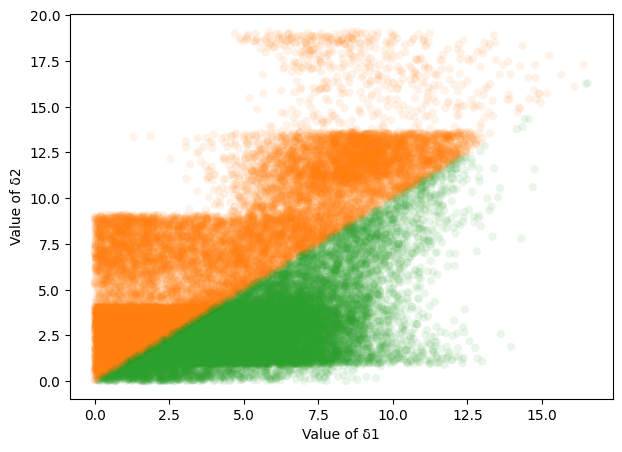

,review_id,text,label,review_text,true_label,peak_end_avg,all_sent_avg,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class
0,382,"BJ's has an impressive amount of, well, stuff....",0.0,"BJ's has an impressive amount of, well, stuff....",0,1.643821,1.180171,1.643821,1.180171,C1
1,33947,Just had to deal with one of my pet peeves: Ho...,-10.0,Just had to deal with one of my pet peeves: Ho...,-1,-7.819759,-5.803635,2.180241,4.196365,C2
2,36181,Pleasantly surprised! I have layovers in Charl...,0.0,Pleasantly surprised! I have layovers in Charl...,0,1.007692,1.689013,1.007692,1.689013,C2
3,37495,Sprouts is a great market. Their produce is g...,5.0,Sprouts is a great market. Their produce is g...,1,8.364314,5.158821,3.364314,0.158821,C1
4,30090,honestly the food is impeccable. if you're goi...,-10.0,honestly the food is impeccable. if you're goi...,-1,-5.525474,-2.615244,4.474526,7.384756,C2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F

df=pd.read_csv(path+"yelp_doc_senti_true.csv")
df_sent_tmp=pd.read_csv(path+"yelp_sent_sentiment_tmp.csv")
df_valid_ids=pd.read_csv(path+"yelp_id_text_label.csv",encoding='utf8')

df=df.merge(df_sent_tmp,on='review_id',how='left')

df=df_valid_ids.merge(df,on='review_id',how='left')

mapping = {0: -1, 1: 0.5, 2: 0, 3: 0.5, 4: 1}

df['label'] = df['label'].replace(mapping)

df.label=df.label*10

df=df.assign(label_peak_end_avg_abs_diff=abs(df.label-df.peak_end_avg))
df=df.assign(label_all_sent_avg_abs_diff=abs(df.label-df.all_sent_avg))

df=df.assign(pred_class=np.where(df.label_peak_end_avg_abs_diff<df.label_all_sent_avg_abs_diff,'C2','C1'))

plt.figure(figsize=(7, 5),  dpi = 100)
plt.scatter(df.label_all_sent_avg_abs_diff,df.label_peak_end_avg_abs_diff, alpha=0.09,c=df.pred_class,edgecolors='none')
plt.xlabel("Value of δ1")
plt.ylabel("Value of δ2")
plt.savefig('emotion_arc_groups.pdf', format='pdf', bbox_inches='tight',dpi=100)
plt.show()
df.head()

In [ ]:
df=pd.read_csv(path+"yelp_doc_senti_true.csv")
df.head()

,review_id,review_text,true_label
0,0,I got 'new' tires from them and within two wee...,-1
1,1,Don't waste your time. We had two different p...,-1
2,2,All I can say is the worst! We were the only 2...,-1
3,3,I have been to this restaurant twice and was d...,-1
4,4,Food was NOT GOOD at all! My husband & I ate h...,-1


In [ ]:
df.head()

,review_id,text,label,review_text,true_label,peak_end_avg,all_sent_avg,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class
0,382,"BJ's has an impressive amount of, well, stuff....",0.0,"BJ's has an impressive amount of, well, stuff....",0,1.643821,1.180171,1.643821,1.180171,C1
1,33947,Just had to deal with one of my pet peeves: Ho...,-10.0,Just had to deal with one of my pet peeves: Ho...,-1,-7.819759,-5.803635,2.180241,4.196365,C2
2,36181,Pleasantly surprised! I have layovers in Charl...,0.0,Pleasantly surprised! I have layovers in Charl...,0,1.007692,1.689013,1.007692,1.689013,C2
3,37495,Sprouts is a great market. Their produce is g...,5.0,Sprouts is a great market. Their produce is g...,1,8.364314,5.158821,3.364314,0.158821,C1
4,30090,honestly the food is impeccable. if you're goi...,-10.0,honestly the food is impeccable. if you're goi...,-1,-5.525474,-2.615244,4.474526,7.384756,C2


In [ ]:
df_yelp=pd.read_csv(path+"yelp_discourse_0609.csv")
df_yelp=df_yelp.assign(pred_class=np.where(df_yelp.score_type1>df_yelp.score_type2,'C1','C2'))
df_yelp=df_yelp.merge(df,on='review_id',how='left')
df_yelp.head()

,review_id,score_type1,score_type2,pred_class_x,text,label,review_text,true_label,peak_end_avg,all_sent_avg,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class_y
0,0,0.743065,0.769247,C2,I got 'new' tires from them and within two wee...,-10.0,I got 'new' tires from them and within two wee...,-1,-6.694527,-5.187687,3.305473,4.812313,C2
1,2,0.687154,0.792379,C2,All I can say is the worst! We were the only 2...,-10.0,All I can say is the worst! We were the only 2...,-1,-6.954005,-4.564262,3.045995,5.435738,C2
2,3,0.604758,0.715736,C2,I have been to this restaurant twice and was d...,-10.0,I have been to this restaurant twice and was d...,-1,-8.240166,-6.111590,1.759834,3.888410,C2
3,4,0.808605,0.803613,C1,Food was NOT GOOD at all! My husband & I ate h...,-10.0,Food was NOT GOOD at all! My husband & I ate h...,-1,-3.197126,-5.480736,6.802874,4.519264,C1
4,5,0.823295,0.760765,C1,This is a tiny Starbucks and it locations like...,0.0,This is a tiny Starbucks and it locations like...,0,-1.656227,-2.038728,1.656227,2.038728,C2


In [ ]:
import numpy as np
X_1 = np.array(df_yelp['score_type1'])
X_2 = np.array(df_yelp['score_type2'])
Y_1 = np.array(df_yelp['label_all_sent_avg_abs_diff'])
Y_2 = np.array(df_yelp['label_peak_end_avg_abs_diff'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [ ]:

X = np.array([X_1, X_2]).T
Y = np.array([Y_1, Y_2]).T
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interaction = interaction.fit_transform(X)

model = LinearRegression()

model.fit(X, Y)

intercept, effects = model.intercept_, model.coef_
print(f"The effect of 1 on Y is: {intercept}")
print(effects)
print(f"The effect of X1 on Y is: {effects[0]}")
print(f"The effect of X2 on Y is: {effects[1]}")
print(f"The effect of X1*X2 on Y is: {effects[2]}")

The effect of 1 on Y is: [6.50364205 6.04931757]
[[-0.81081224 -1.37815875]
 [ 0.06102059 -1.36386476]]
The effect of X1 on Y is: [-0.81081224 -1.37815875]
The effect of X2 on Y is: [ 0.06102059 -1.36386476]


IndexError: ignored

In [ ]:
import numpy as np
np.mean(df_yelp['score_type1'])

0.6812607418590969

In [ ]:
import numpy as np
np.mean(df_yelp['score_type2'])

0.6849367715758744

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['label_all_sent_avg_abs_diff']<df_yelp['label_peak_end_avg_abs_diff']]['score_type1'])

0.6858724812835224

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['label_all_sent_avg_abs_diff']<df_yelp['label_peak_end_avg_abs_diff']]['score_type2'])

0.6883894312626163

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']<df_yelp['score_type2']]['score_type2'])

0.7819560329546464

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']<df_yelp['score_type2']]['label_peak_end_avg_abs_diff'])

5.019605719174256

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']<df_yelp['score_type2']]['label_all_sent_avg_abs_diff'])

4.904243778804694

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']>df_yelp['score_type2']]['score_type1'])

0.7225733830010683

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']>df_yelp['score_type2']]['score_type2'])

0.5802848962308255

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']>df_yelp['score_type2']]['label_peak_end_avg_abs_diff'])

5.304636544974924

In [ ]:
import numpy as np
np.mean(df_yelp[df_yelp['score_type1']>df_yelp['score_type2']]['label_all_sent_avg_abs_diff'])

5.118496802750742

In [ ]:
df_yelp[df_yelp['score_type2']==1][df_yelp['label_all_sent_avg_abs_diff']>df_yelp['label_peak_end_avg_abs_diff']+1][df_yelp['score_type1']<0.7]

<ipython-input-79-df411f0c8d51>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_yelp[df_yelp['score_type2']==1][df_yelp['label_all_sent_avg_abs_diff']>df_yelp['label_peak_end_avg_abs_diff']+1][df_yelp['score_type1']<0.7]


,review_id,score_type1,score_type2,pred_class_x,text,label,review_text,true_label,peak_end_avg,all_sent_avg,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class_y
2424,3484,0.633222,1.0,C2,"Ok sports bar, good happy Hour values. Wings ...",0.0,"Ok sports bar, good happy Hour values. Wings ...",0,1.406144,2.486314,1.406144,2.486314,C2
3180,4634,0.496784,1.0,C2,I was diagnosed with Celiac Disease (Intoleran...,10.0,I was diagnosed with Celiac Disease (Intoleran...,1,4.288175,-0.502924,5.711825,10.502924,C2
3981,5774,0.608903,1.0,C2,I waited almost 20 minutes while i watched oth...,5.0,I waited almost 20 minutes while i watched oth...,-1,-1.259977,-3.799846,6.259977,8.799846,C2
5351,7818,0.690430,1.0,C2,My first experience to the Breakfast Club.... ...,5.0,My first experience to the Breakfast Club.... ...,-1,-1.836579,-2.896695,6.836579,7.896695,C2
5427,7917,0.607300,1.0,C2,Not only is the food delicious but the service...,10.0,Not only is the food delicious but the service...,1,8.575070,6.924938,1.424930,3.075062,C2
6337,9249,0.574663,1.0,C2,I place an order askind for jalape\u00f1es onl...,-10.0,I place an order askind for jalape\u00f1es onl...,-1,-6.401673,-3.610131,3.598327,6.389869,C2
6980,10150,0.625935,1.0,C2,I read the reviews and should have steered awa...,-10.0,I read the reviews and should have steered awa...,-1,-8.176323,-4.086528,1.823677,5.913472,C2
8322,12059,0.679069,1.0,C2,"Beers are good as were the wings, but the burg...",5.0,"Beers are good as were the wings, but the burg...",-1,-3.013793,-4.462087,8.013793,9.462087,C2
9603,13790,0.591620,1.0,C2,"Tip...go for a really late lunch, (3:30pm or s...",5.0,"Tip...go for a really late lunch, (3:30pm or s...",1,6.977835,1.655060,1.977835,3.344940,C2
10143,14514,0.624296,1.0,C2,What a fun trip down memory lane! I loved seei...,5.0,What a fun trip down memory lane! I loved seei...,1,5.721904,2.992892,0.721904,2.007108,C2


In [ ]:
df_yelp[df_yelp['score_type1']==1][df_yelp['label_all_sent_avg_abs_diff']+1<df_yelp['label_peak_end_avg_abs_diff']][df_yelp['score_type2']<0.7]

<ipython-input-80-c71469b4e1a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_yelp[df_yelp['score_type1']==1][df_yelp['label_all_sent_avg_abs_diff']+1<df_yelp['label_peak_end_avg_abs_diff']][df_yelp['score_type2']<0.7]


,review_id,score_type1,score_type2,pred_class_x,text,label,review_text,true_label,peak_end_avg,all_sent_avg,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class_y
570,789,1.0,0.563193,C1,We had dinner at the Beach House on Friday on ...,0.0,We had dinner at the Beach House on Friday on ...,0,6.898265,2.183947,6.898265,2.183947,C1
1842,2642,1.0,0.489894,C1,"Wow, lots of hate on here about this place. Ga...",0.0,"Wow, lots of hate on here about this place. Ga...",0,8.907862,3.629692,8.907862,3.629692,C1
4249,6166,1.0,0.654480,C1,I went to Pewter Rose this morning with my gir...,-10.0,I went to Pewter Rose this morning with my gir...,-1,0.028193,-2.146092,10.028193,7.853908,C1
5848,8527,1.0,0.653641,C1,"Wow great find for my wife, son and myself whi...",5.0,"Wow great find for my wife, son and myself whi...",1,8.801782,7.126296,3.801782,2.126296,C1
6973,10143,1.0,0.573703,C1,The biggest Louis Vuitton store in North Ameri...,0.0,The biggest Louis Vuitton store in North Ameri...,0,-6.663423,-5.305154,6.663423,5.305154,C1
9360,13447,1.0,0.649910,C1,I didn't find the prices to match that of othe...,0.0,I didn't find the prices to match that of othe...,0,-7.737181,-5.788290,7.737181,5.788290,C1
20722,29835,1.0,0.650059,C1,Not much to say other then you better have mon...,5.0,Not much to say other then you better have mon...,-1,-6.422381,-5.374014,11.422381,10.374014,C1
24514,35285,1.0,0.674517,C1,This was a great spot to take a break from it ...,5.0,This was a great spot to take a break from it ...,1,0.658671,4.557801,4.341329,0.442199,C1


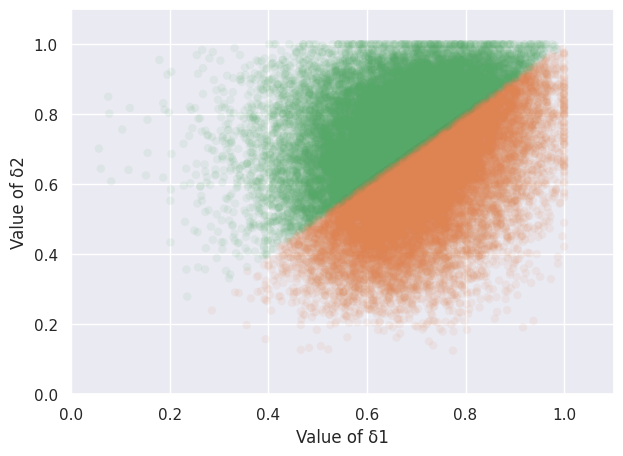

In [ ]:
df=pd.read_csv(path+"yelp_discourse_0609.csv")
df=df.assign(pred_class=np.where(df.score_type1>df.score_type2,'C1','C2'))
import seaborn as sns
sns.set()
plt.figure(figsize=(7, 5),  dpi = 100)
plt.scatter(df.score_type1,df.score_type2, alpha=0.09,c=df.pred_class,edgecolors='none')
plt.xlabel("Value of δ1")
plt.ylabel("Value of δ2")
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.savefig('yelp_discourse.png', format='png', bbox_inches='tight',dpi=100)
plt.show()

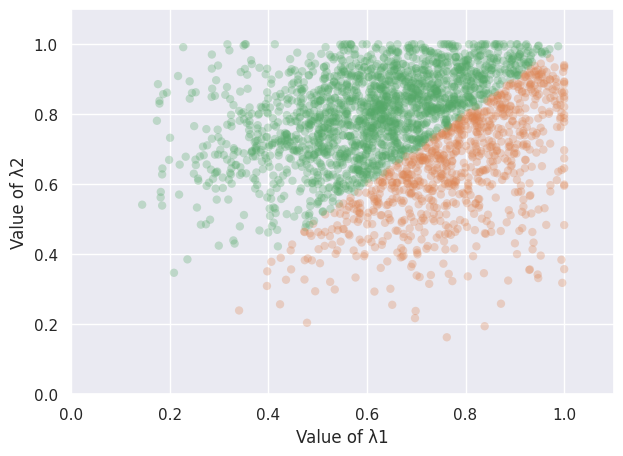

,review_id,score_type1,score_type2,pred_class
0,0,0.629000,0.839762,C2
1,1,0.635136,0.834571,C2
2,2,0.662217,0.604334,C1
3,3,0.733568,0.807557,C2
4,4,0.675061,0.885900,C2


In [ ]:
df=pd.read_csv(path+"amazon_discourse.csv")

df=df.assign(pred_class=np.where(df.score_type1>df.score_type2,'C1','C2'))

import seaborn as sns
sns.set()
plt.figure(figsize=(7, 5),  dpi = 100)
plt.scatter(df.score_type1,df.score_type2, alpha=0.3,c=df.pred_class,edgecolors='none')
plt.xlabel("Value of λ1")
plt.ylabel("Value of λ2")
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.savefig('amazon_discourse.pdf', format='pdf', bbox_inches='tight',dpi=100)
plt.show()
df.head()

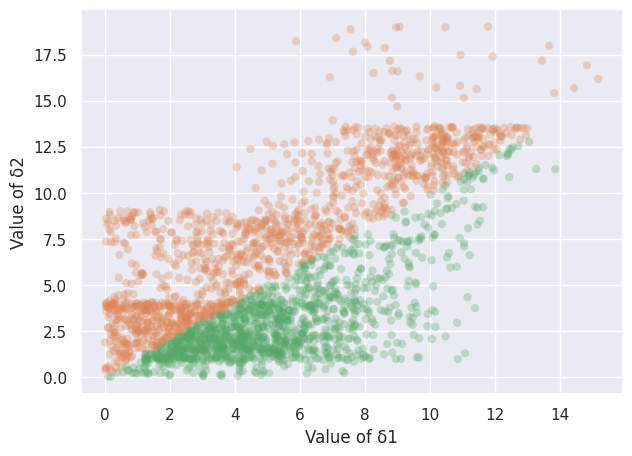

,review_id,review_text,true_label,stars,peak_end_avg,all_sent_avg,peak,begin,end,label,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class
0,0,Not worth the price and very bad cap design. P...,-1,1,-8.532749,-5.613471,-8.532749,-6.965369,-8.532749,-10.0,1.467251,4.386529,C2
1,1,"Garbage!. Shoes were purchased on March 6, 201...",-1,1,-6.780058,-3.891096,-8.444131,-6.703739,-5.115985,-10.0,3.219942,6.108904,C2
2,2,I do not recommend this printer. It's taken me...,-1,1,-6.852338,-5.686874,-8.235282,-7.933328,-5.469393,-10.0,3.147662,4.313126,C2
3,3,Not happy. I ordered this giving the correct s...,-1,1,-8.490959,-5.797876,-8.515934,-8.185697,-8.465985,-10.0,1.509041,4.202124,C2
4,4,I was taking the color out with vitamin c tabl...,-1,1,-6.336684,-4.820422,-8.571650,-6.454623,-4.101717,-10.0,3.663316,5.179578,C2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F

df=pd.read_csv(path+"amazon_doc_senti_true.csv")
df_sent_tmp=pd.read_csv(path+"amazon_sent_sentiment_tmp.csv")
df['review_id'] = df_sent_tmp['review_id']
#df_valid_ids=pd.read_csv(path+"yelp_id_text_label.csv",encoding='utf8')

df=df.merge(df_sent_tmp,on='review_id',how='left')

#df=df_valid_ids.merge(df,on='review_id',how='left')

mapping = {1: -1, 2: 0.5, 3: 0, 4: 0.5, 5: 1}

df['label'] = df['stars'].replace(mapping)

df.label=df.label*10

df=df.assign(label_peak_end_avg_abs_diff=abs(df.label-df.peak_end_avg))
df=df.assign(label_all_sent_avg_abs_diff=abs(df.label-df.all_sent_avg))

df=df.assign(pred_class=np.where(df.label_peak_end_avg_abs_diff<df.label_all_sent_avg_abs_diff,'C2','C1'))

plt.figure(figsize=(7, 5),  dpi = 100)
plt.scatter(df.label_all_sent_avg_abs_diff,df.label_peak_end_avg_abs_diff, alpha=0.3,c=df.pred_class,edgecolors='none')
plt.xlabel("Value of δ1")
plt.ylabel("Value of δ2")
plt.savefig('emotion_arc_groups_amazon.pdf', format='pdf', bbox_inches='tight',dpi=100)
plt.show()
df.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F

df=pd.read_csv(path+"amazon_doc_senti_true.csv")
df.drop(['review_id'], axis=1)
df_sent_tmp=pd.read_csv(path+"amazon_sent_sentiment_tmp.csv")
#df_valid_ids=pd.read_csv(path+"yelp_id_text_label.csv",encoding='utf8')

df['review_id'] = df_sent_tmp['review_id']
df = df.merge(df_sent_tmp,on='review_id',how='left')
df_discourse=pd.read_csv(path+"amazon_discourse.csv")
df=df.merge(df_discourse,on='review_id',how='left')

mapping = {1: -1, 2: 0.5, 3: 0, 4: 0.5, 5: 1}

df['label'] = df['stars'].replace(mapping)

df.label=df.label*10

df=df.assign(label_peak_end_avg_abs_diff=abs(df.label-df.peak_end_avg))
df=df.assign(label_all_sent_avg_abs_diff=abs(df.label-df.all_sent_avg))
df=df.assign(pred_class=np.where(df.label_peak_end_avg_abs_diff<df.label_all_sent_avg_abs_diff,'C2','C1'))
df.head()

,review_id,review_text,true_label,stars,peak_end_avg,all_sent_avg,peak,begin,end,score_type1,score_type2,label,label_peak_end_avg_abs_diff,label_all_sent_avg_abs_diff,pred_class
0,0,Not worth the price and very bad cap design. P...,-1,1,-8.532749,-5.613471,-8.532749,-6.965369,-8.532749,0.629000,0.839762,-10.0,1.467251,4.386529,C2
1,1,"Garbage!. Shoes were purchased on March 6, 201...",-1,1,-6.780058,-3.891096,-8.444131,-6.703739,-5.115985,0.635136,0.834571,-10.0,3.219942,6.108904,C2
2,2,I do not recommend this printer. It's taken me...,-1,1,-6.852338,-5.686874,-8.235282,-7.933328,-5.469393,0.662217,0.604334,-10.0,3.147662,4.313126,C2
3,3,Not happy. I ordered this giving the correct s...,-1,1,-8.490959,-5.797876,-8.515934,-8.185697,-8.465985,0.733568,0.807557,-10.0,1.509041,4.202124,C2
4,4,I was taking the color out with vitamin c tabl...,-1,1,-6.336684,-4.820422,-8.571650,-6.454623,-4.101717,0.675061,0.885900,-10.0,3.663316,5.179578,C2


In [ ]:
import numpy as np
def print_stat(sub_df):
    print("Samples: ",len(sub_df))
    print("lambda1: ",np.mean(sub_df['label_all_sent_avg_abs_diff']))
    print("lambda2: ",np.mean(sub_df['label_peak_end_avg_abs_diff']))
    print("delta1: ",np.mean(sub_df['score_type1']))
    print("delta2: ",np.mean(sub_df['score_type2']))
print_stat(df)

Samples:  2582
lambda1:  5.197160425888159
lambda2:  5.321438034474716
delta1:  0.6642424224837377
delta2:  0.7559173237659833


In [ ]:
print_stat(df[df['label_all_sent_avg_abs_diff']<df['label_peak_end_avg_abs_diff']])

Samples:  1280
lambda1:  5.1237035742513175
lambda2:  7.683753804479254
delta1:  0.6729598022018828
delta2:  0.7601480590761991


In [ ]:
print_stat(df[df['label_all_sent_avg_abs_diff']>df['label_peak_end_avg_abs_diff']])

Samples:  1302
lambda1:  5.269376071122535
lambda2:  2.999038506359655
delta1:  0.6556723410403997
delta2:  0.751758075534742


In [ ]:
df_sent_tmp.head()

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
0,0,-8.532749,-5.613471,-8.532749,-6.965369,-8.532749
1,1,-6.780058,-3.891096,-8.444131,-6.703739,-5.115985
2,2,-6.852338,-5.686874,-8.235282,-7.933328,-5.469393
3,3,-8.490959,-5.797876,-8.515934,-8.185697,-8.465985
4,4,-6.336684,-4.820422,-8.571650,-6.454623,-4.101717
